## 1. Problem Statement
Predict if a loan can be approved or not

## 2. Hypothesis
Analyse which all factors could impact the loan approval. 

Some of the factors that could impact the loan approval are:
1. Salary
2. Less loan amount - easily approved
3. Lesser monthly repayment amount - easily approved
4. Prior loans default rate
5. Loan term

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## 3. Download the dataset and get the train and test datasets

In [2]:
train = pd.read_csv("/Users/sara/Documents/GitHub/implementations/Loan Prediction/train_ctrUa4K.csv")
test = pd.read_csv("/Users/sara/Documents/GitHub/implementations/Loan Prediction/test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

## 4. Check the various columns in the train and test datasets and determine their datatypes and shape

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We see there are three different formats of datatypes.
1. object: Means categorical
2. int64: Integer variables
3. float64: Numerical with decimal values

In [7]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (614, 13)
test shape: (367, 12)


Train dataset has 614 rows and 13 columns, while test dataset has 367 rows and 12 columns (without the target variable - here loan status)

## 5. Perform Univariate analysis of the dataset

Points to be noted:

There are 3 types of features involved:
1. Categorical features: Having a category - Gender, Married, Self_Employed, Credit_History, Loan_Status
2. Ordinal features: Categorical variables with some order involved - Dependents, Education, Property_Area
3. Numerical features: Having numerical values - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

* For categorical variables, we can use frequency table (with normalization for percentages) and/or bar plots.
* For numerical variables, probability density plots can be used to check the distribution - box plots or dist plots.

**Target Variable - Loan_Status**

Frequency Table of Loan_Status: Loan_Status
Y    422
N    192
Name: count, dtype: int64
-----------------------------------------------
Percentage of Loan_Status: Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64
-----------------------------------------------


<Axes: xlabel='Loan_Status'>

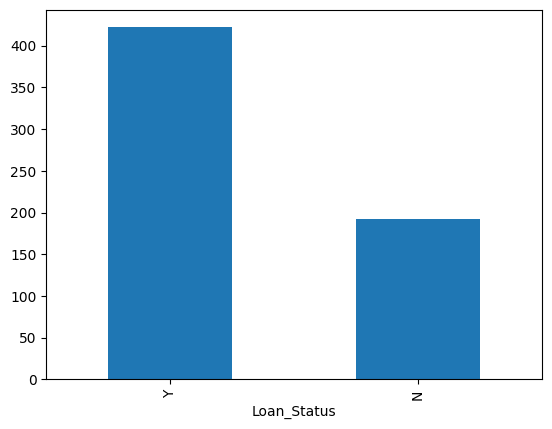

In [8]:
print("Frequency Table of Loan_Status:",train.Loan_Status.value_counts())
print("-----------------------------------------------")
print("Percentage of Loan_Status:",train.Loan_Status.value_counts(normalize=True))
print("-----------------------------------------------")
train.Loan_Status.value_counts().plot.bar()


**Analysis: 422 (approx. 69%) loans out of the total 614 loans were approved.**

**Independent Categorical Variables**

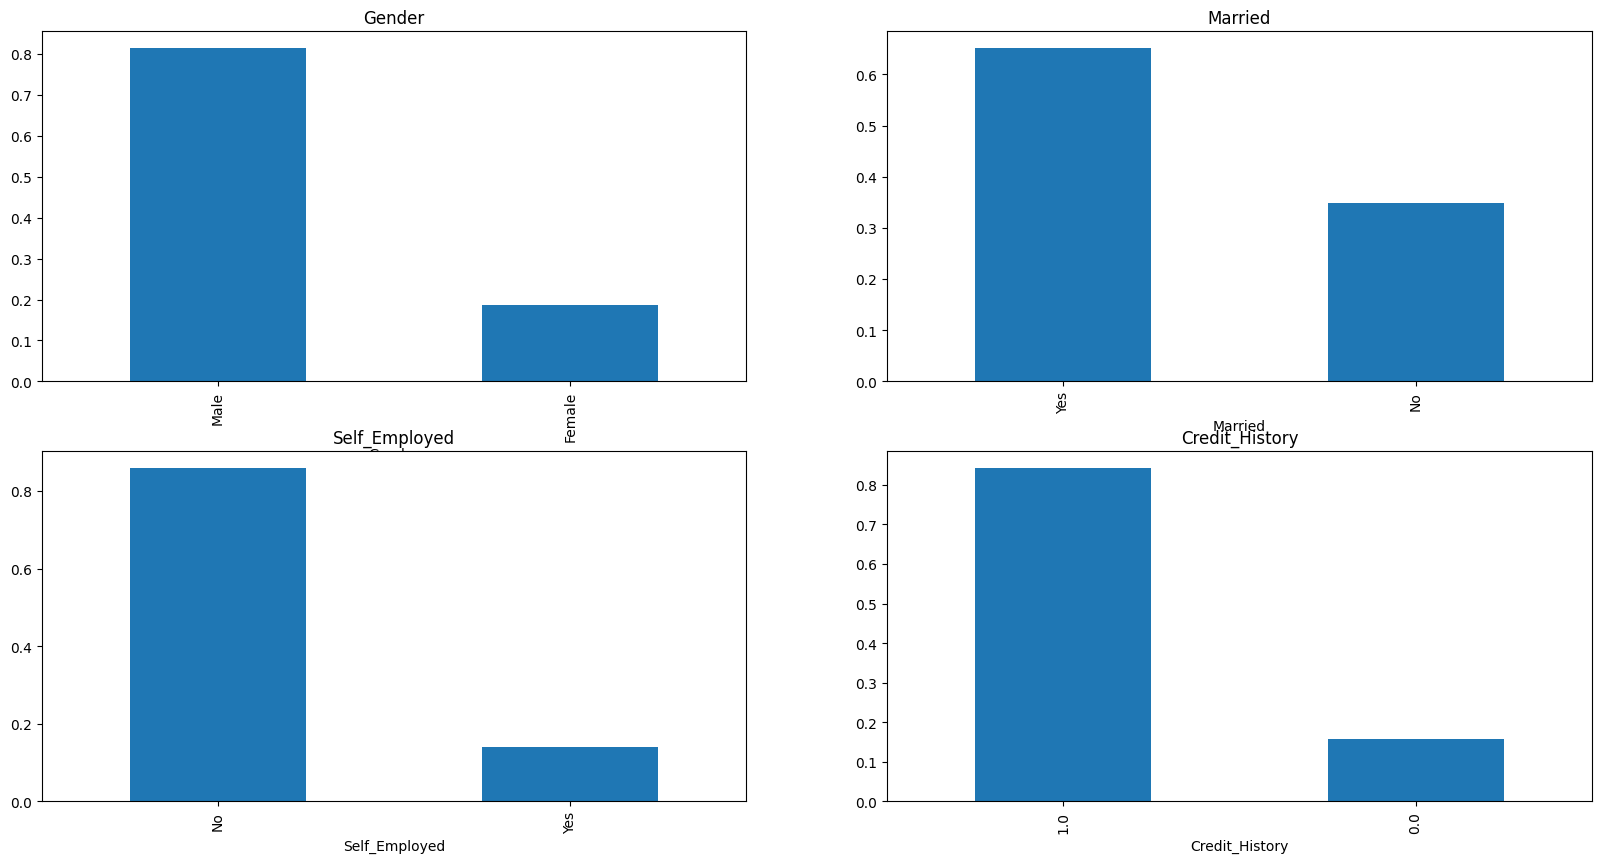

In [9]:
plt.figure(1)

plt.subplot(221)
train.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")

plt.subplot(222)
train.Married.value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train.Self_Employed.value_counts(normalize=True).plot.bar(title="Self_Employed")

plt.subplot(224)
train.Credit_History.value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()

**Inferences:**

**1. 80% of the applicants in the dataset are males.**

**2. Around 65% of the applicants are married.**

**3. About 15% of the applicants are self employed.**

**4. Around 85% of the applicants have repaid their debts.**

**Independent Ordinal Variables**

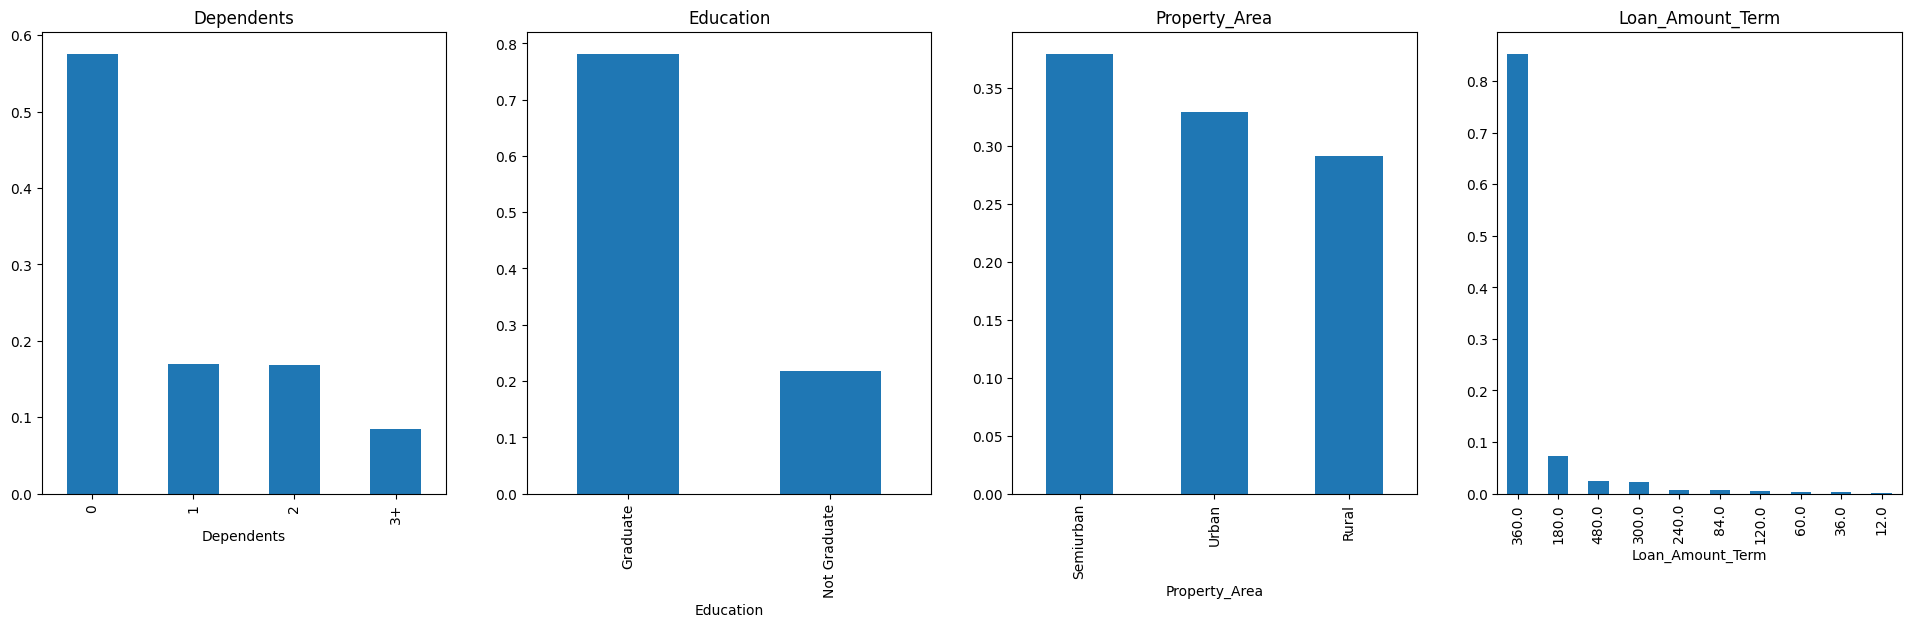

In [10]:
plt.figure(1)

plt.subplot(141)
train.Dependents.value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")

plt.subplot(142)
train.Education.value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(143)
train.Property_Area.value_counts(normalize=True).plot.bar(title="Property_Area")

plt.subplot(144)
train.Loan_Amount_Term.value_counts(normalize=True).plot.bar(title="Loan_Amount_Term")

plt.show()

**Inferences:**

**1. Most of the applicants have no dependents.**

**2. About 80% of the applicants are graduates.**

**3. Most of the applicants are from semiurban area.**

**4. More than 80% of the loans are of 1 year terms.**

**Independent Numerical Variables**

**1. Applicant Income**

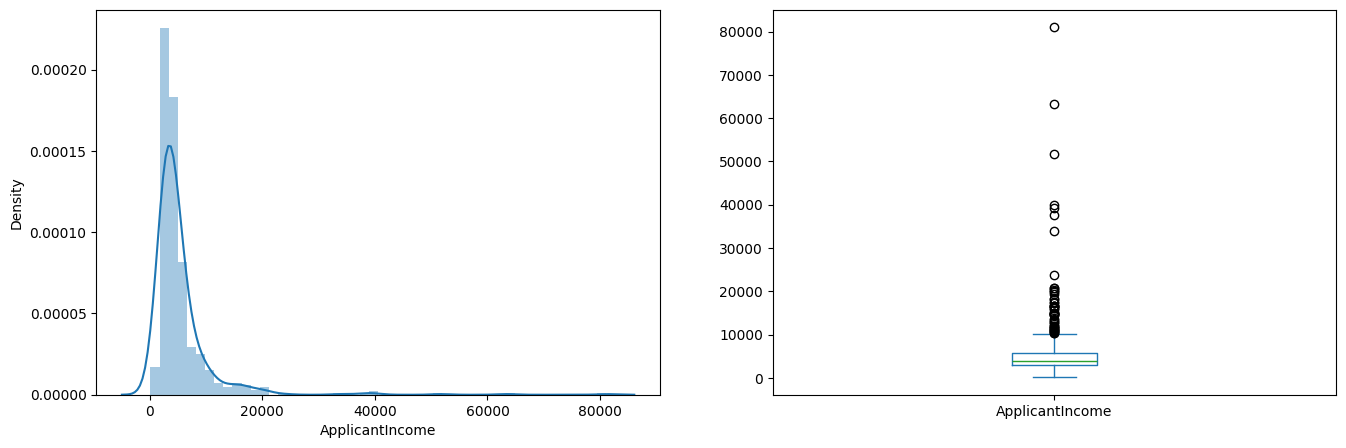

In [11]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train.ApplicantIncome)

plt.subplot(122)
train.ApplicantIncome.plot.box(figsize=(16,5))

plt.show()

**Inferences:**

1. Not normally distributed, right-skewed.
2. Box plot shows a lot of outliers - could be the income disparity in the society.

Let us check the Income of the applicant versus their education.

Text(0.5, 0.98, 'Applicant Income by Education')

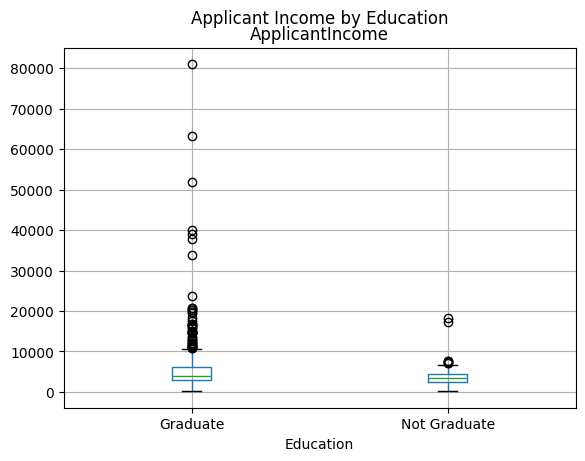

In [12]:
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("Applicant Income by Education")

**Inferences:**

From the above plot, it can be seen that more number of graduates have higher income which appear as outliers.

**2. Coapplicant Income**

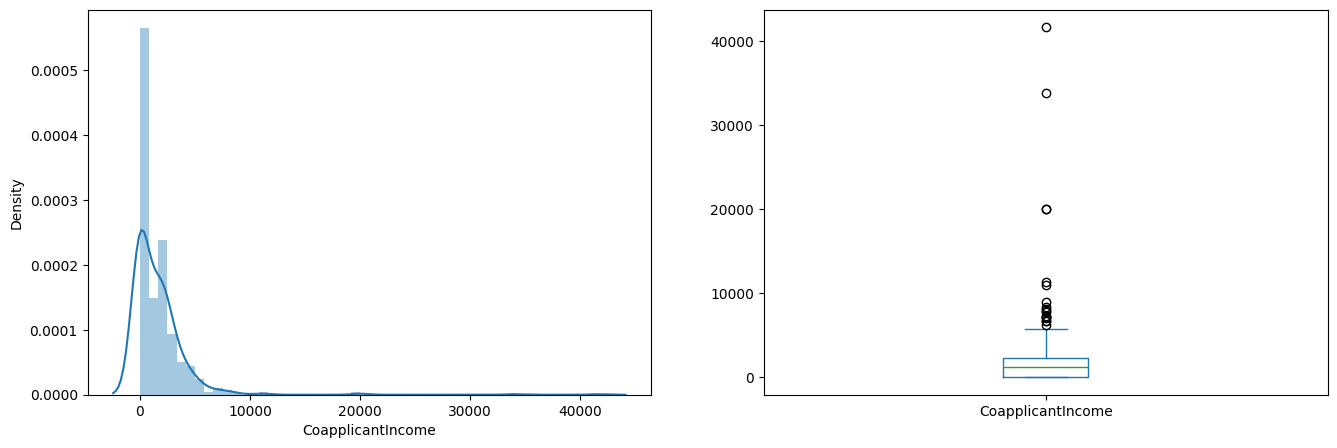

In [13]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train.CoapplicantIncome)

plt.subplot(122)
train.CoapplicantIncome.plot.box(figsize=(16,5))

plt.show()

**Inferences:**

1. Not normally distributed, right-skewed - ranging from 0 to 5000.
2. Box plot shows a lot of outliers - could be the income disparity in the society - similar to ApplicantIncome.

**3. Loan Amount**

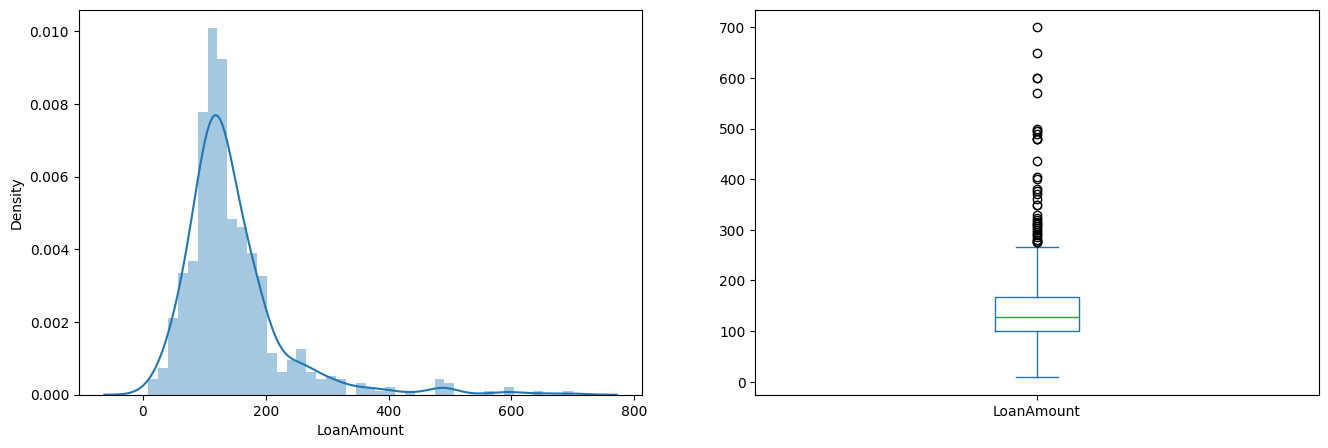

In [14]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train.LoanAmount)

plt.subplot(122)
train.LoanAmount.plot.box(figsize=(16,5))

plt.show()

**Inferences:**

* Lot of outliers, but mostly normally distributed.

## 6. Perform Bivariate analysis of the dataset with respect to the target variable

Recalling some of the points from our initial hypothesis:

1. If loan amount is less, easy approval.
2. If prior loan repayment is good, easy approval.
3. If income is high, easy approval.
4. If loan term is less, easy approval.
5. If each term repayment amount is less, easy approval.

To verify if the above hypothesis is correct, lets do the bivariate analysis.

**Categorical / Ordinal Independent Variables vs Target Variable**

* Categorical Independent variables - Gender, Married, Dependents, Education, Self-Employed, Credit_History, Property_Area
* Target Variable - Loan_Status

In [15]:
Gender = pd.crosstab(train.Gender, train.Loan_Status)
Married = pd.crosstab(train.Married, train.Loan_Status)
Dependents = pd.crosstab(train.Dependents, train.Loan_Status)
Education = pd.crosstab(train.Education, train.Loan_Status)
Self_Employed = pd.crosstab(train.Self_Employed, train.Loan_Status)
Credit_History = pd.crosstab(train.Credit_History, train.Loan_Status)
Property_Area = pd.crosstab(train.Property_Area, train.Loan_Status)

<Axes: xlabel='Property_Area'>

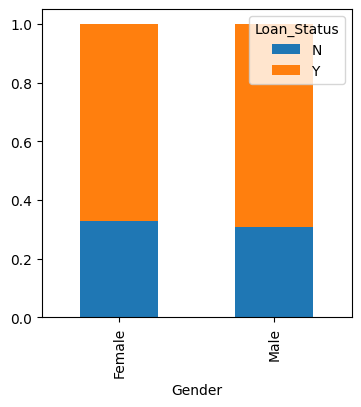

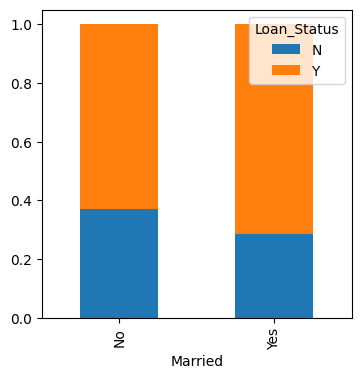

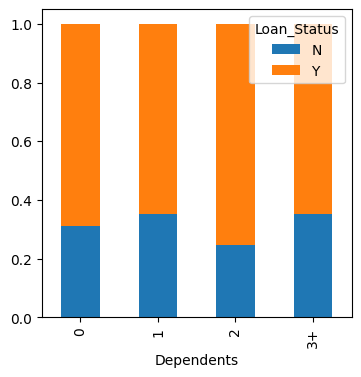

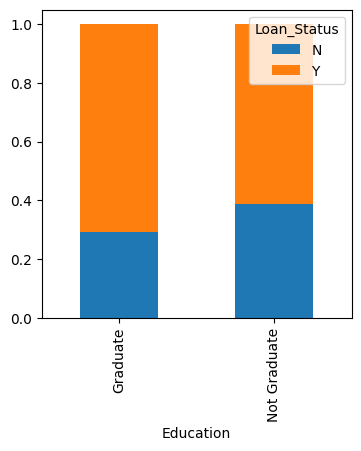

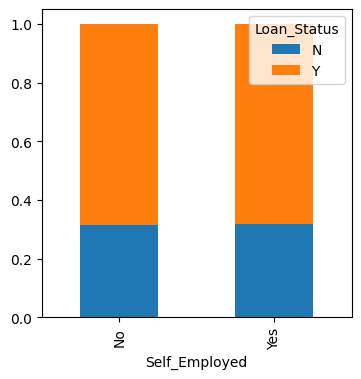

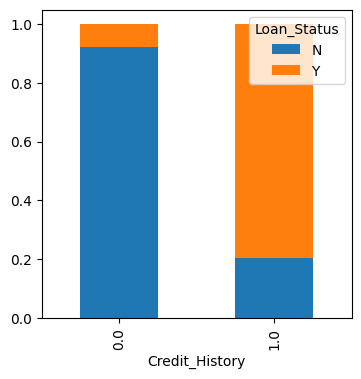

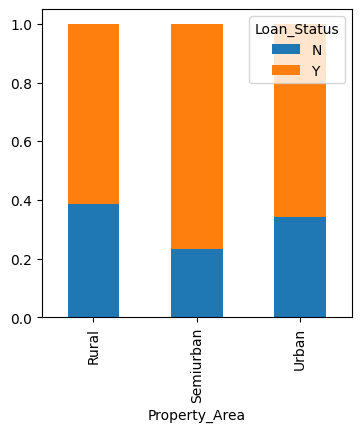

In [16]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4))
Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

**Inferences:**

**1. Gender: Loan Status is more or less same for male and female applicants.**

**2. Married: More number of male applicants have loans approved.**

**3. Dependents: Status is similar for applications with 1 or 3+ dependents.**

**4. Education: More graduates have their loans approved.**

**5. Self-Employed: No particular inference for self-employment.**

**6. Credit_History: More number of people with credit_history 1 have their loans approved.**

**7. Property_Area: More approvals for Semiurbans areas.**

**Numerical Independent Variables vs Target Variable**

**1. ApplicantIncome**

We need to find the mean income of people with approved loans vs. mean income of people with unapproved loans and then compare.

<Axes: xlabel='Loan_Status'>

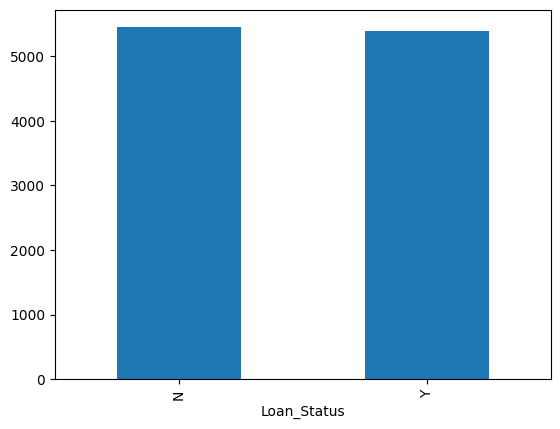

In [17]:
train.ApplicantIncome.groupby(train.Loan_Status).mean().plot.bar()

**Inferences:**

* No differences can be seen in mean applicant income.

So, lets try making bins for the applicant income based on its values to analyze further.

Text(0, 0.5, 'Percentage')

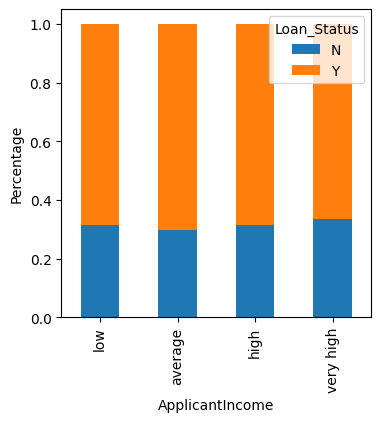

In [18]:
# print(train.ApplicantIncome.max(),train.ApplicantIncome.min(), train.ApplicantIncome.mean())
# print(train.ApplicantIncome.value_counts())

bins = [0, 2500, 4000, 6000, 81000]
groups = ['low', 'average', 'high', 'very high']

train['Income_bin'] = pd.cut(train.ApplicantIncome, bins, labels = groups)

#Draw the plot

Income_bin = pd.crosstab(train.Income_bin, train.Loan_Status)
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize = (4,4))

plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")

**Inferences:**

* From the above graph it is clear that the ApplicantIncome has no effect on the Loan approval, as we had initially thought in our hypothesis.

**2. Coapplicant Income**

<Axes: xlabel='Loan_Status'>

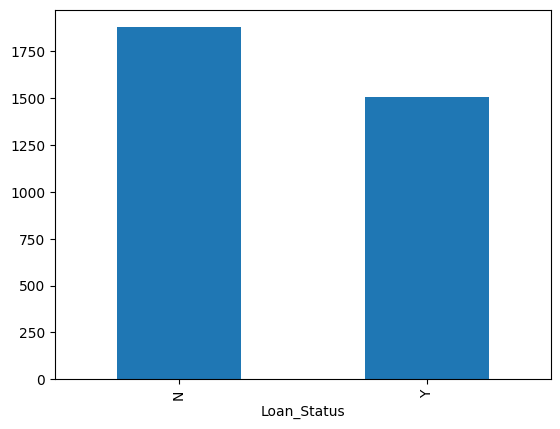

In [19]:
train.CoapplicantIncome.groupby(train.Loan_Status).mean().plot.bar()

Text(0, 0.5, 'Percentage')

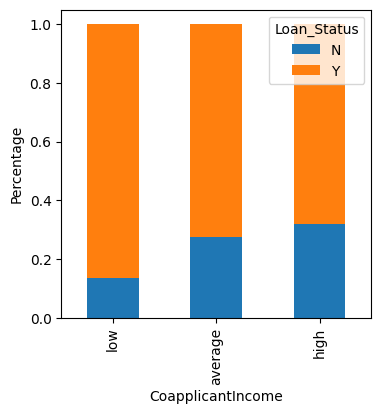

In [20]:
# print(train.CoapplicantIncome.max(),train.CoapplicantIncome.min(), train.CoapplicantIncome.mean())
# print(train.CoapplicantIncome.value_counts())

bins = [0, 1000, 3000, 4200]
groups = ['low', 'average', 'high']

train['Coapp_Income_bin'] = pd.cut(train.CoapplicantIncome, bins, labels = groups)

#Draw the plot

Coapp_Income_bin = pd.crosstab(train.Coapp_Income_bin, train.Loan_Status)
Coapp_Income_bin.div(Coapp_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize = (4,4))

plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")

* The above plot shows that loan approval chances are high, when the coapplicant's income is less, which seems wierd. This could be because, many applicants do not have a coapplicant, so their income remains zero. To surpass this issue, we might have to take the Total Income to analyse this Income field.

**3. Total Income - new feature**

In [21]:
train['TotalIncome'] = train.ApplicantIncome + train.CoapplicantIncome
print(train.TotalIncome)


0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64


Text(0, 0.5, 'Percentage')

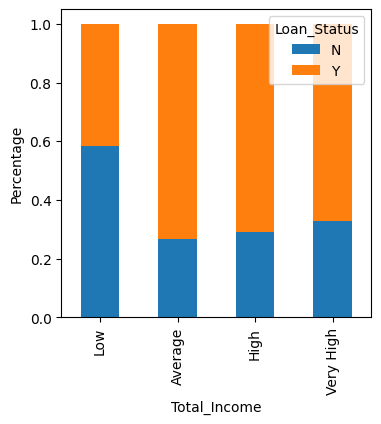

In [22]:
# print(train.TotalIncome.min(), train.TotalIncome.max())

bins = [0, 2500, 4000, 6000, 81000]
groups = ["Low", "Average", "High", "Very High"]

train["Total_Income_bin"] = pd.cut(train.TotalIncome, bins, labels = groups)
# print(train.Total_Income_bin)

#Draw the plot

Total_Income_bin = pd.crosstab(train.Total_Income_bin, train.Loan_Status)
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

plt.xlabel("Total_Income")
plt.ylabel("Percentage")

**Inferences:**

* We can see that less number of loans are getting approved, when the total income is less, compared to the average/high/very high income earning groups.

**4. Loan Amount**

<Axes: xlabel='Loan_Status'>

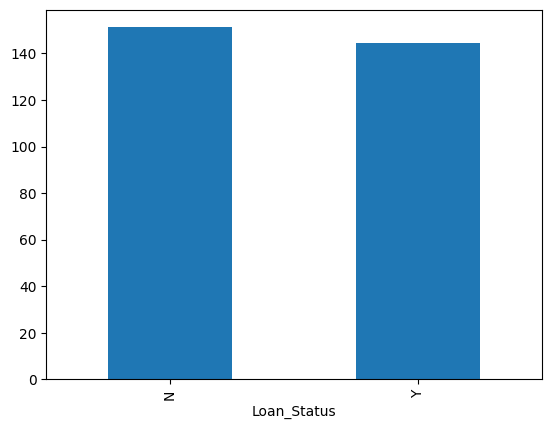

In [23]:
train.LoanAmount.groupby(train.Loan_Status).mean().plot.bar()

Text(0, 0.5, 'Percentage')

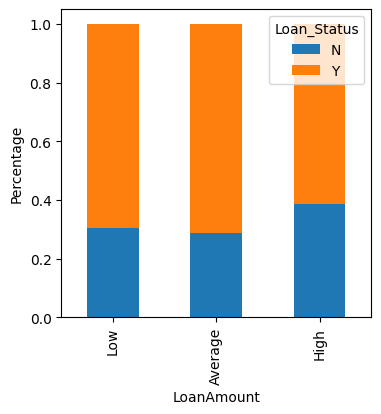

In [24]:
# print(train.LoanAmount)
# print(train.LoanAmount.min(), train.LoanAmount.max())

bins = [0, 100, 200, 700]
groups = ["Low", "Average", "High"]

train["Loan_Amount_bin"] = pd.cut(train.LoanAmount, bins, labels = groups)
Loan_Amount_bin = pd.crosstab(train.Loan_Amount_bin, train.Loan_Status)
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True, figsize =(4,4))

plt.xlabel("LoanAmount") 
plt.ylabel("Percentage")

**Inferences:**

* It can be seen from the above graph that the approved loans is higher for Low and Average Loan Amount as compared to high Loan Amount - which is what we had hypothesized initially.

**Find correlation between numerical variables and target variables**

* For this, we will drop all the bins we had created for the exploration part, as we do not need these bins in the dataset.

* We can change the dependents column from 3+ to 3 to make it a numerical variable.

* We can also convert the target variable into 0 and 1 to see if there is a correlation with numerical variables. We can replace N with 0 and Y with 1.

In [25]:
# train_hm = train.copy()
train_hm = train.drop(["Loan_ID", 
                        #   "Gender", "Married", "Education", "Self_Employed", "Property_Area",
                          "Income_bin", "Coapp_Income_bin", "Loan_Amount_bin", "Total_Income_bin", "TotalIncome"],axis=1)
train = train_hm.copy()

In [26]:
train_hm.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
train_hm["Dependents"].replace("3+", "3", inplace=True)
# test_hm["Dependents"].replace("3+", "3", inplace=True)
train_hm["Loan_Status"].replace("N", 0, inplace=True)
train_hm["Loan_Status"].replace("Y", 1, inplace=True)
train_hm["Gender"].replace("Male", 0, inplace=True)
train_hm["Gender"].replace("Female", 1, inplace=True)
train_hm["Married"].replace("No", 0, inplace=True)
train_hm["Married"].replace("Yes", 1, inplace=True)
train_hm["Education"].replace("Graduate", 1, inplace=True)
train_hm["Education"].replace("Not Graduate", 0, inplace=True)
train_hm["Self_Employed"].replace("No", 0, inplace=True)
train_hm["Self_Employed"].replace("Yes", 1, inplace=True)
train_hm["Property_Area"].replace("Urban", 2, inplace=True)
train_hm["Property_Area"].replace("Rural", 0, inplace=True)
train_hm["Property_Area"].replace("Semiurban", 1, inplace=True)

In [28]:
print(train_hm.Dependents.unique())
print(train_hm.Loan_Status.unique())

['0' '1' '2' '3' nan]
[1 0]


**Now lets look at the correlation between the numerical variables.**

In [29]:
train_hm.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
train_hm.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [31]:
train_hm.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

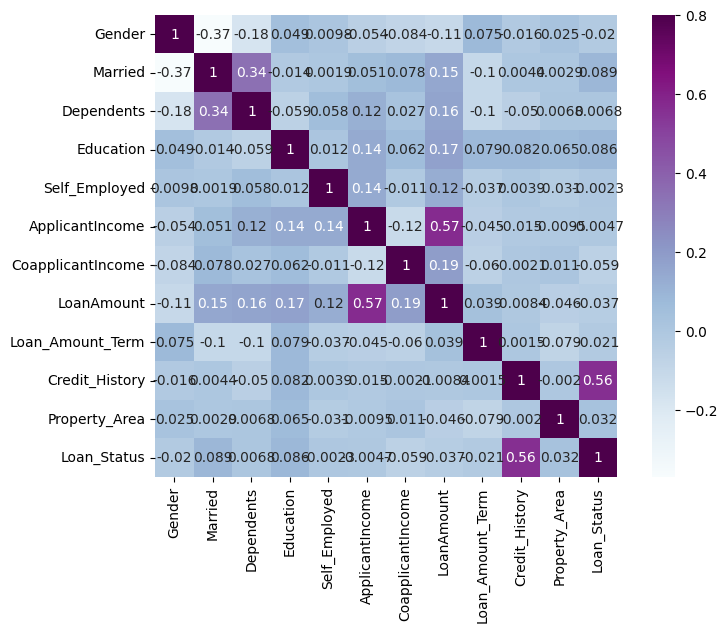

In [32]:
heatmap = train_hm.corr()

f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(heatmap, vmax = 0.8, square = True, cmap = "BuPu", annot=True)

**We can see that Applicant Income and Loan Amount are most correlated to each other as well as Credit History and Loan Status.**

**Loan Amount is also correlated to CoapplicantIncome.**

## 7. Missing Values Imputation and Outlier treatment

In [33]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

We can fill the missing values in the following ways:

1. For categorical variables - using mode
2. For numerical variables - using mean or median

##### Categorical variables - Gender, Married, Dependents, Self_Employed, Credit_History

In [34]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0], inplace=True)

##### Loan Amount Term

In [35]:
train.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [36]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace=True)

##### Loan Amount

In [37]:
train.LoanAmount.value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [38]:
print(train.LoanAmount.min())
print(train.LoanAmount.mean())
print(train.LoanAmount.max())
print(train.LoanAmount.median())
print(train.LoanAmount.value_counts())

9.0
146.41216216216216
700.0
128.0
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


We will use median to fill missing values of Loan Amount as we had seen that it had many outliers.

In [39]:
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)

In [40]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Similarly, lets fill test dataset missing values in the same manner

In [41]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Categorical

In [42]:
test.Gender.fillna(test.Gender.mode()[0], inplace=True)
test.Married.fillna(test.Married.mode()[0], inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0], inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0], inplace=True)

##### Loan Amount Term

In [43]:
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace=True)

##### Numerical - Loan Amount

In [44]:
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)

In [45]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier treatment

Taking log transformation, can help remove skewness as it does not affect small values much but reduces larger values. So we get a distribution similar to a normal distribution.

In [46]:
train_hm.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

1. Applicant Income

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

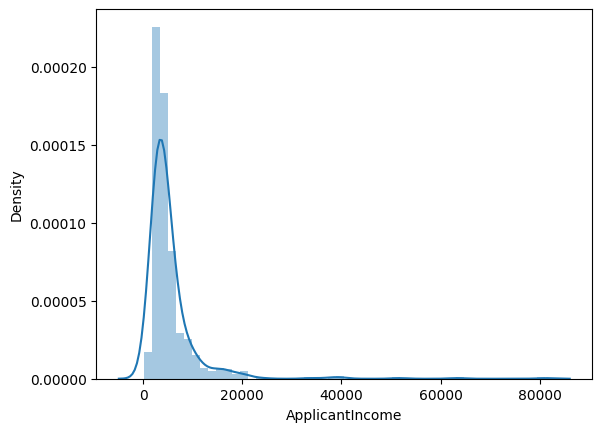

In [47]:
sns.distplot(train_hm.ApplicantIncome)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

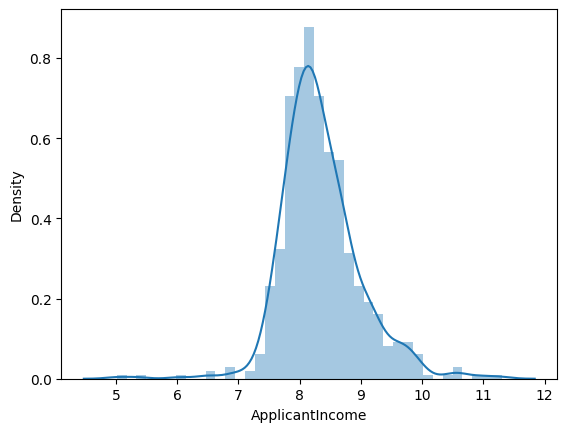

In [48]:
train_hm.ApplicantIncome_log = np.log(train_hm.ApplicantIncome)
sns.distplot(train_hm.ApplicantIncome_log)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

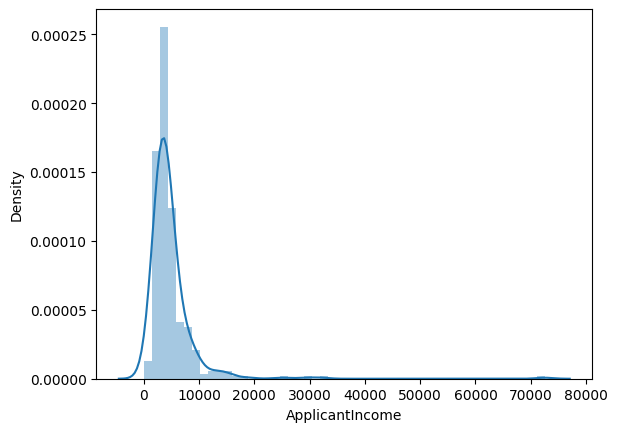

In [49]:
sns.distplot(test.ApplicantIncome)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

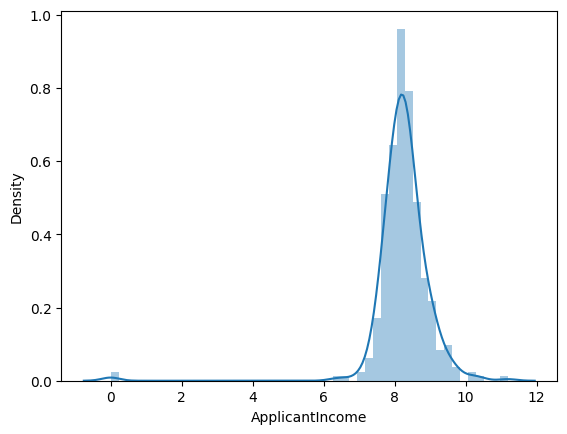

In [50]:
test.ApplicantIncome_log = np.log1p(test.ApplicantIncome)
sns.distplot(test.ApplicantIncome_log)

2. CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

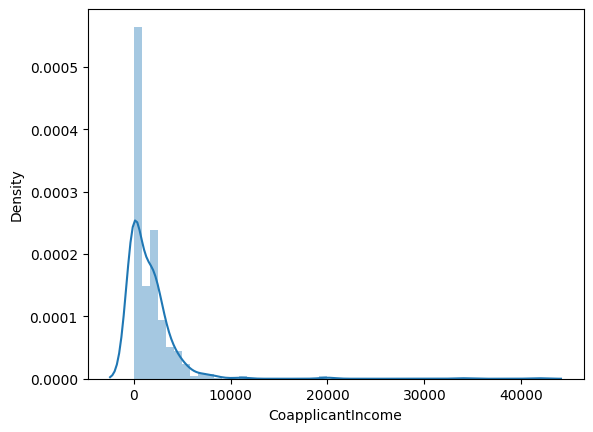

In [51]:
sns.distplot(train_hm.CoapplicantIncome)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

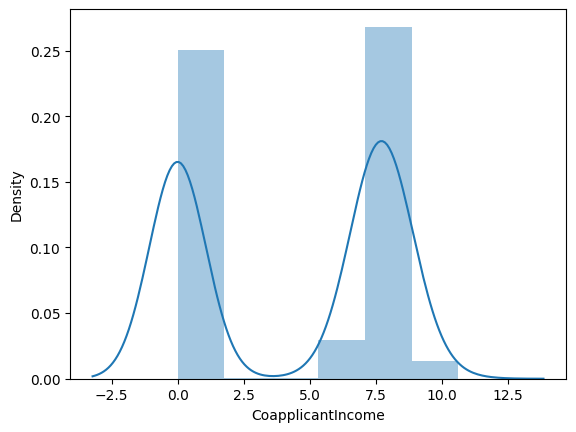

In [52]:
train_hm.CoapplicantIncome_log = np.log1p(train_hm.CoapplicantIncome)
sns.distplot(train_hm.CoapplicantIncome_log)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

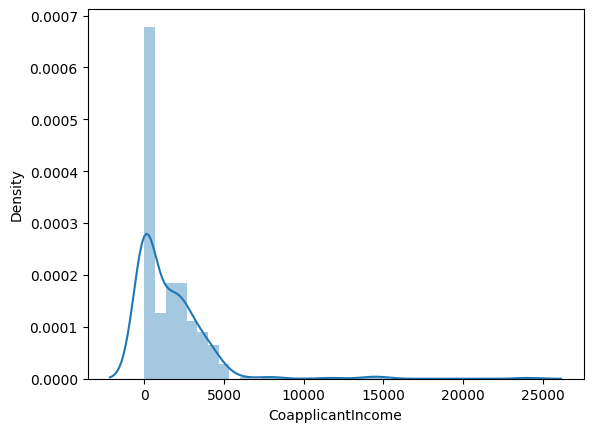

In [53]:
sns.distplot(test.CoapplicantIncome)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

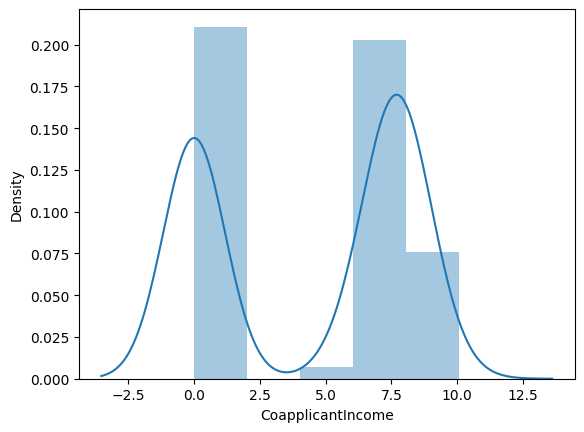

In [54]:
test.CoapplicantIncome_log = np.log1p(test.CoapplicantIncome)
sns.distplot(test.CoapplicantIncome_log)

3. Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Density'>

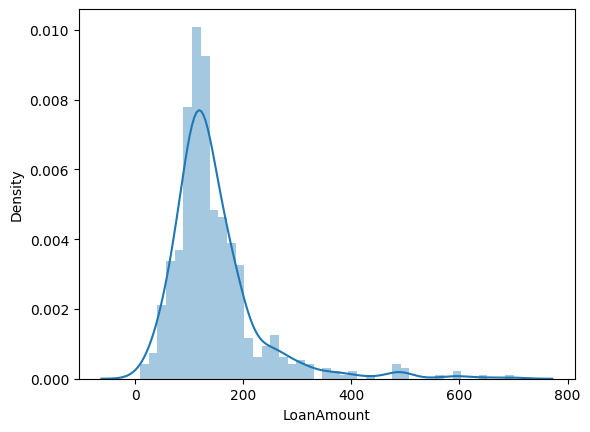

In [55]:
sns.distplot(train_hm.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Density'>

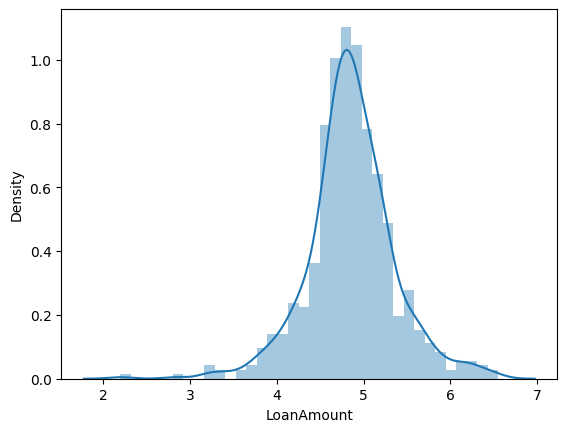

In [56]:
train_hm.LoanAmount_log = np.log(train_hm.LoanAmount)
sns.distplot(train_hm.LoanAmount_log)

<Axes: xlabel='LoanAmount', ylabel='Density'>

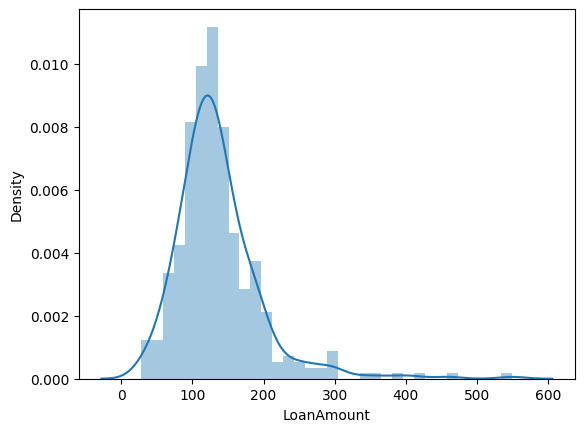

In [57]:
sns.distplot(test.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Density'>

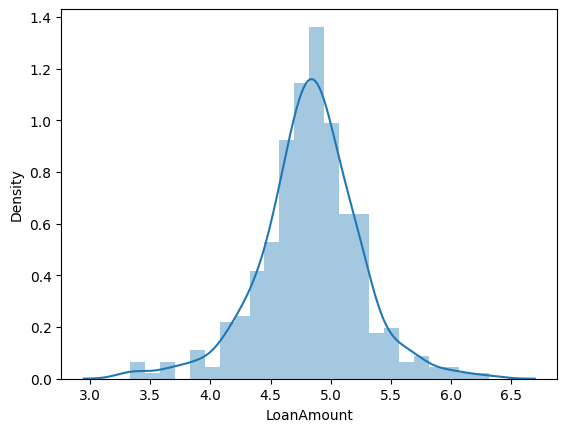

In [58]:
test.LoanAmount_log = np.log(test.LoanAmount)
# test.LoanAmount_log.min()
sns.distplot(test.LoanAmount_log)

<Axes: >

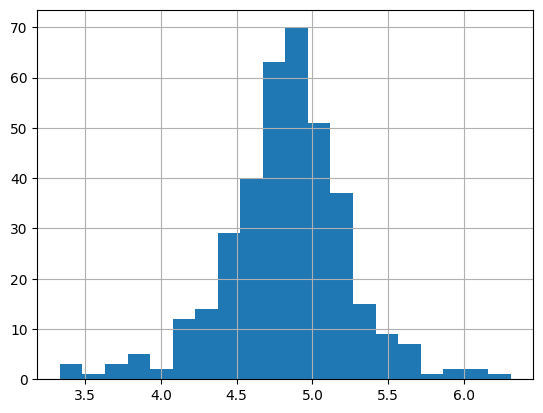

In [59]:
test.LoanAmount_log.hist(bins=20)

## 8. Model Building

In [60]:
train_eda = train.copy()
test_eda = test.copy()

In [61]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
# train = train.drop('Loan_ID', axis=1)

In [63]:
test = test.drop('Loan_ID', axis=1)

In [64]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [65]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [66]:
X = pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


In [67]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True


In [68]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,False,True,True,False,True,False,False,False,False,True,True,False,False,False,True


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred_cv = model.predict(X_cv)

accuracy_score(y_cv, y_pred_cv)

0.7891891891891892

In [72]:
y_pred_test = model.predict(test)
# y_pred_test

In [73]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [74]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [75]:
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [76]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv', index=False)

#### Using Stratified KFold

In [77]:
from sklearn.model_selection import StratifiedKFold

sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:",sum_score/(i-1))


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8032786885245902

Mean validation accuracy is: 0.8110622417699587


In [78]:
print(yvl)

0      Y
10     Y
19     Y
24     N
37     Y
      ..
587    Y
588    Y
595    Y
607    Y
610    Y
Name: Loan_Status, Length: 122, dtype: object


In [79]:
print(y_pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y

Lets check the ROC Curve

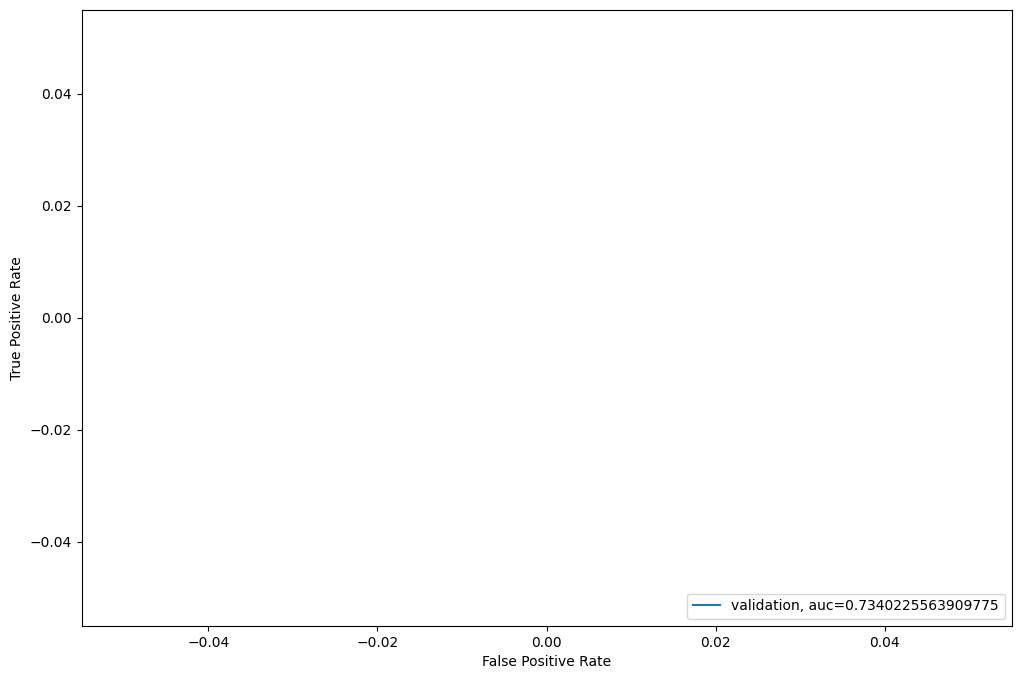

In [80]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred, pos_label=1)

auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize = (12,8))

plt.plot(fpr, tpr, label='validation, auc=' + str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)
plt.show()

In [81]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [82]:
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [83]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic_kfold.csv', index=False)

## 9. Based on domain knowledge, building new features which could affect the target variable

**1. Total Income: Applicant Income + Coapplicant Income**

**2. EMI: Ratio of Loan Amount with Loan Amount Term**

**3. Balance Income: Income left after paying EMI**

In [84]:
# train = train_original.copy()
# test = test_original.copy()

**1. Total Income**

In [85]:
train['TotalIncome'] = train.ApplicantIncome + train.CoapplicantIncome
test['TotalIncome'] = test.ApplicantIncome + test.CoapplicantIncome

<Axes: xlabel='TotalIncome', ylabel='Density'>

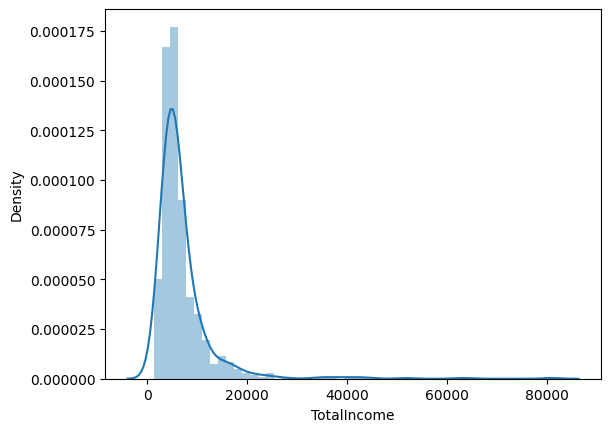

In [86]:
sns.distplot(train.TotalIncome)

Shifted to the left, so right-skewed. So lets take the log transformation.

In [87]:
train['TotalIncome_log'] = np.log(train.TotalIncome)
test['TotalIncome_log'] = np.log(test.TotalIncome)

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

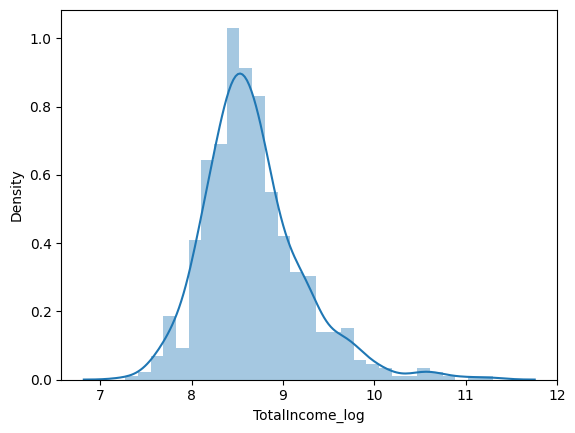

In [88]:
sns.distplot(train.TotalIncome_log)

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

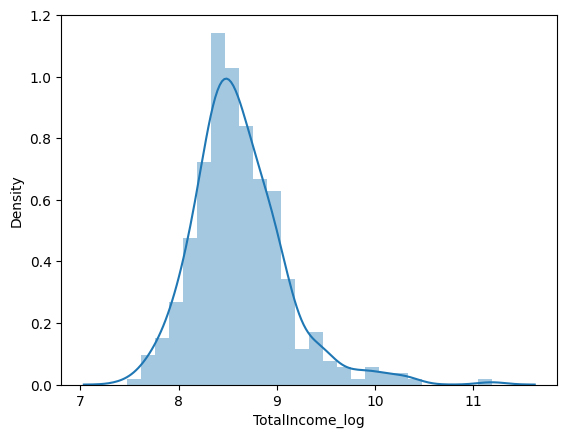

In [89]:
sns.distplot(test.TotalIncome_log)

Now the distribution looks normal and effect of extreme values has been reduced.

**2. EMI**

In [90]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

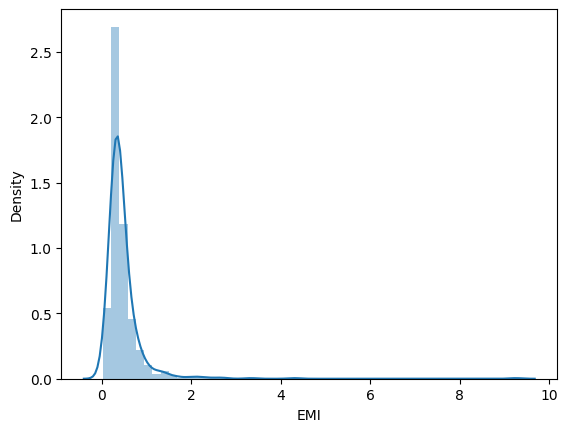

In [91]:
sns.distplot(train.EMI)

<Axes: xlabel='EMI', ylabel='Density'>

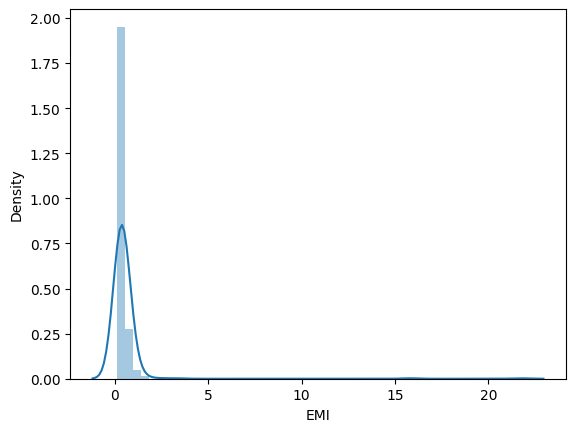

In [92]:
sns.distplot(test.EMI)

**3. Balance Income**

In [93]:
train['BalanceIncome'] = train['TotalIncome'] - train['EMI']*1000
#Multiplying with 1000 to make the units equal

test['BalanceIncome'] = test['TotalIncome'] - test['EMI']*1000

<Axes: xlabel='BalanceIncome', ylabel='Density'>

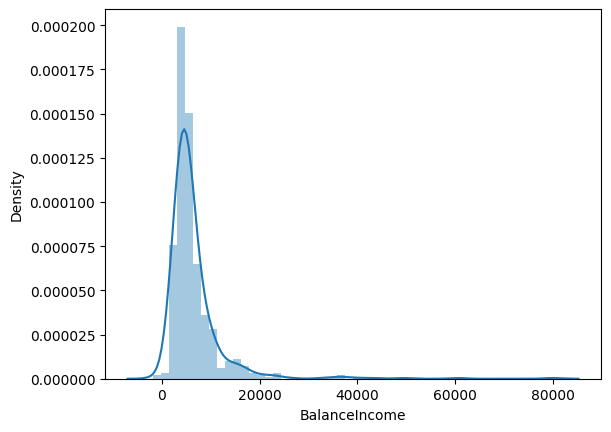

In [94]:
sns.distplot(train['BalanceIncome'])

<Axes: xlabel='BalanceIncome', ylabel='Density'>

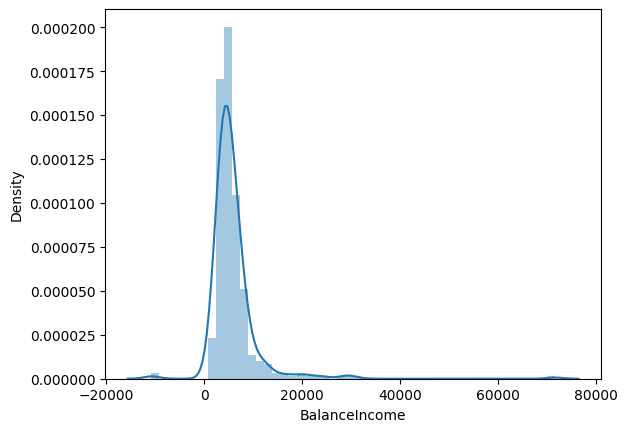

In [95]:
sns.distplot(test['BalanceIncome'])

**Now we need to drop the features using which we have created these new features, else there will be high correlation between the old features and the newly created features. Also, logistic regression assumes that the variables are not highly correlated. Moreover, noise has to be removed - so removing the correlated variables will reduce the noise also.**

In [96]:
train = train.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
test = test.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)

## 10. Model building with the newly created features

In [97]:
X = train.copy()
X.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,TotalIncome,TotalIncome_log,EMI,BalanceIncome
0,1.0,False,True,True,False,True,False,False,False,True,...,False,False,False,True,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,False,True,False,True,False,True,False,False,True,...,False,True,False,False,True,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,False,True,False,True,True,False,False,False,True,...,True,False,False,True,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,False,True,False,True,True,False,False,False,False,...,False,False,False,True,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,False,True,True,False,True,False,False,False,True,...,False,False,False,True,False,True,6000.0,8.699515,0.391667,5608.333333


In [98]:
X = X.drop(['Loan_Status_N', 'Loan_Status_Y'], axis=1)
X.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncome_log,EMI,BalanceIncome
0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [99]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [100]:
sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7642276422764228

5 of kfold 5
accuracy_score 0.8032786885245902

Mean validation accuracy is: 0.7996801279488205


In [101]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [102]:
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [103]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic_kfold_newfeatures.csv', index=False)

### Using Decision Tree

In [104]:
from sklearn import tree

sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.6422764227642277

2 of kfold 5
accuracy_score 0.6747967479674797

3 of kfold 5
accuracy_score 0.7479674796747967

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy is: 0.6937758230041318


In [105]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [106]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('decision_tree.csv', index=False)

### Using Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7377049180327869

Mean validation accuracy is: 0.7881913901106224


Mean Validation Accuracy for this model is 0.78. Now we can try to improve this by tuning the hyperparameters of the model - using GridSearch.

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

paramgrid = {'max_depth' : list(range(1, 20, 2)), 'n_estimators' : list(range(1, 200, 20))}

gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

#Fit the grid search model
gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

The optimized value for max_depth is 3 and n_estimators is 41. So, now we can build our model with these values.

In [109]:
sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=121)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy is: 0.8126749300279889


In [110]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [111]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('random_forest.csv', index=False)

### Lets find the feature importance now

In [112]:
importances = pd.Series(model.feature_importances_, index = X.columns)

importances

Credit_History             0.473798
Gender_Female              0.008351
Gender_Male                0.007252
Married_No                 0.012532
Married_Yes                0.020189
Dependents_0               0.001615
Dependents_1               0.004006
Dependents_2               0.005555
Dependents_3+              0.000263
Education_Graduate         0.008616
Education_Not Graduate     0.020465
Self_Employed_No           0.005238
Self_Employed_Yes          0.006757
Property_Area_Rural        0.040578
Property_Area_Semiurban    0.031900
Property_Area_Urban        0.005859
TotalIncome                0.105898
TotalIncome_log            0.089576
EMI                        0.055851
BalanceIncome              0.095701
dtype: float64

<Axes: >

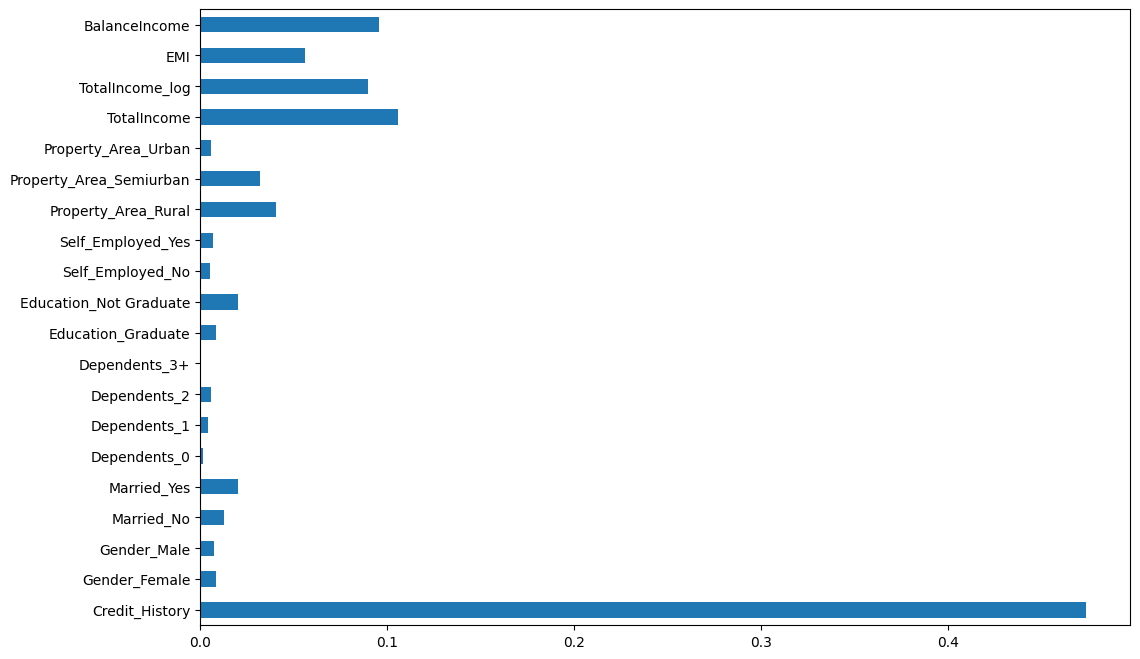

In [113]:
importances.plot(kind='barh', figsize=(12,8))

We can see that the most important feature is the Credit History followed by the new features we had created - Total Income, Balance Income and EMI.

### XGBoost

In [114]:
from xgboost import XGBClassifier

sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

y.replace('Y', 1, inplace=True)
y.replace('N', 0, inplace=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = XGBClassifier(max_depth=4, n_estimators=50)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.7560975609756098

3 of kfold 5
accuracy_score 0.7479674796747967

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7704918032786885

Mean validation accuracy is: 0.7703585232573638


In [115]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('xgb.csv', index=False)

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

paramgrid = {'max_depth' : list(range(1, 20, 2)), 'n_estimators' : list(range(1, 200, 20))}

gridSearch = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

#Fit the grid search model
gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [117]:
sum_score = 0
i = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

y.replace('Y', 1, inplace=True)
y.replace('N', 0, inplace=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = XGBClassifier(max_depth=1, n_estimators=41)

    model.fit(xtr, ytr)

    y_pred_vl = model.predict(xvl)

    score = accuracy_score(yvl, y_pred_vl)
    print("accuracy_score", score)

    i+=1

    y_pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]

    sum_score += score

print("\nMean validation accuracy is:", sum_score/(i-1))


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy is: 0.8077835532453685


In [118]:
submission['Loan_Status'] = y_pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('xgb1.csv', index=False)

## 11. Combining Applicants with 0, 1, 2, 3 and more dependents and making a new feature

In [123]:
train.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,TotalIncome,TotalIncome_log,EMI,BalanceIncome
0,1.0,False,True,True,False,True,False,False,False,True,...,False,False,False,True,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,False,True,False,True,False,True,False,False,True,...,False,True,False,False,True,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,False,True,False,True,True,False,False,False,True,...,True,False,False,True,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,False,True,False,True,True,False,False,False,False,...,False,False,False,True,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,False,True,True,False,True,False,False,False,True,...,False,False,False,True,False,True,6000.0,8.699515,0.391667,5608.333333


In [122]:
train['IncomePerHead'] = train['BalanceIncome']/train['Dependents']

TypeError: unsupported operand type(s) for /: 'float' and 'str'